# Impact of AirBnB on the Prices of Houses in Dublin between June 2021 and May 2022

- Student Name: Karina Jonina
- Student Code: c00278440
- Module Title: Dissertation
- Module Code: DISSC5201
- Supervisor: Dr Oisin Cawley
- Course Name: Master of Science in Data Science
- Course Code: CW_KCDAR_M
- Assignment Weighting: 100%
- Due Date: 15th August 2022

# Residential Property Price Register

The dataset collected from https://www.propertypriceregister.ie/ has a lot of errors.

In [127]:
# import packages
import numpy as np
import pandas as pd
import matplotlib
import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import re
import geopandas as gpd
# # Will ensure that all rows are displayed
# pd.set_option('display.max_rows', None) 

# Will ensure that all columns are displayed
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [158]:
# read the CSV file
ppr = pd.read_csv('Data/final_ppr.csv', 
                  parse_dates = ['date'], 
                  low_memory=False)

# Will ensure that all columns are displayed
pd.set_option('display.max_columns', None) 

In [129]:
ppr.head()

,id,date,month_year,total_address,formatted_address,input_string,eircode,price,not_full_market_price,vat_exclusive,description,size_description,eircode_availability,latitude,longitude,geometry,eircode_name,eircode_description,area_in_km2_eircode,lea,area_in_km2_lea,smallest_guid,council,county,small_area_name,small_area_guid_area_in_km2,house_bungalow,flat_apartment,bed_sit,caravan_mobile_home,type_of_accommodation_not_stated,total_type_of_accommodation,pre_1919,1919_1945,1946_1960,1961_1970,1971_1980,1981_1990,1991_2000,2001_2010,2011_or_later,year_built_not_stated,total_year_built,1_room,2_rooms,3_rooms,4_rooms,5_rooms,6_rooms,7_rooms,8_or_more_rooms,number_of_rooms_not_stated,total_number_of_rooms,house_bungalow_%,flat_apartment_%,bed_sit_%,caravan_mobile_home_%,type_of_accommodation_not_statd_%,pre_1919_%,1919_1945_%,1946_1960_%,1961_1970_%,1971_1980_%,1981_1990_%,1991_2000_%,2001_2010_%,2011_or_later_%,year_built_not_stated_%,1_room_%,2_rooms_%,3_rooms_%,4_rooms_%,5_rooms_%,6_rooms_%,7_rooms_%,8_or_more_rooms_%,number_of_rooms_not_stated_%,vacant_dwellings,housing_stock,vacancy_rate_%,electoral_divisions,area_in_km2_ed,station,crime_total,range_lea_listings,lea_no_of_listings,range_ed_no_of_listings,ed_no_of_listings,dist_to_railway,dist_to_university,dist_to_luas,dist_to_commercial_zones,dist_to_motorways,dist_to_bus_stops,dist_to_industrial_zones
0,1000000,2022-06-30,2022-06,"25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...","25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...","25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...",D08Y2Y6,40000.00000,No,No,Second-Hand Dwelling house /Apartment,Unknown Size,EIRCODE AVAILABLE,53.33537,-6.28824,POINT (-6.2882437 53.3353729),D08,DUBLIN 8,12.70079,SOUTH WEST INNER CITY LEA,5.38274,4c07d11e-39c2-851d-e053-ca3ca8c0ca7f,DUBLIN CITY COUNTY COUNCIL,DUBLIN,MERCHANTS QUAY F,0.01295,107.00000,10.00000,0.00000,0.00000,2.00000,119.00000,78.00000,8.00000,5.00000,3.00000,5.00000,11.00000,6.00000,1.00000,0.00000,2.00000,119.00000,7.00000,37.00000,33.00000,28.00000,5.00000,3.00000,0.00000,0.00000,6.00000,119.00000,0.90000,0.08000,0.00000,0.00000,0.02000,0.66000,0.07000,0.04000,0.03000,0.04000,0.09000,0.05000,0.01000,0.00000,0.02000,0.06000,0.31000,0.28000,0.24000,0.04000,0.03000,0.00000,0.00000,0.05000,90.00000,1089.00000,8.30000,"MERCHANTS QUAY F, CO.DUBLIN",0.29849,KEVIN STREET,2535.00000,No Airbnbs Present,0.00000,<5 Airbnb listings,3.00000,1.27487,1.02592,0.44276,0.25444,5.32245,0.08611,0.16389
1,1000001,2022-06-30,2022-06,"8 THIRLESTANE TERRACE, THOMAS COURT, DUBLIN 8,...","THOMAS CT, SAINT CATHERINE'S, DUBLIN, IRELAND","8 THIRLESTANE TERRACE, THOMAS COURT, DUBLIN 8,...",D08Y3V5,600000.00000,No,No,Second-Hand Dwelling house /Apartment,Unknown Size,EIRCODE AVAILABLE,53.34232,-6.28179,POINT (-6.2817912 53.3423154),D08,DUBLIN 8,12.70079,SOUTH WEST INNER CITY LEA,5.38274,4c07d11e-34d2-851d-e053-ca3ca8c0ca7f,DUBLIN CITY COUNTY COUNCIL,DUBLIN,USHERS C,0.02896,4.00000,49.00000,0.00000,0.00000,0.00000,53.00000,26.00000,6.00000,4.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,15.00000,53.00000,3.00000,17.00000,15.00000,9.00000,2.00000,0.00000,0.00000,0.00000,7.00000,53.00000,0.08000,0.92000,0.00000,0.00000,0.00000,0.49000,0.11000,0.08000,0.02000,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06000,0.32000,0.28000,0.17000,0.04000,0.00000,0.00000,0.00000,0.13000,167.00000,1999.00000,8.40000,"USHERS C, CO.DUBLIN",0.39831,KEVIN STREET,2535.00000,No Airbnbs Present,0.00000,<5 Airbnb listings,3.00000,0.84054,0.25349,0.59838,0.13970,3.94754,0.10272,0.04261
2,1000002,2022-06-29,2022-06,"11 BOW BRIDGE, BOW BRIDGE HOUSE, KILMAINHAM, D...","11 BOW BRIDGE, KILMAINHAM, DUBLIN 8, D08 A0K2,...","11 BOW BRIDGE, BOW BRIDGE HOUSE, KILMAINHAM, D...",D08P903,225000.00000,No,No,Second-Hand Dwelling house /Apartment,Unknown Size,EIRCODE AVAILABLE,53.34241,-6.29771,POINT (-6.2977107 53.34240819999999),D08,DUBLIN 8,12.70079,SOUTH WEST INNER CITY LEA,5.38274,4c07d11e-0b36-851d-e053-ca3ca8c0ca7f,DUBLIN CITY COU

### Exploring Duplicates

In [130]:
# ... and duplicates
print("This dataset contains {} duplicates of the same address.".format(ppr['total_address'].duplicated().sum()))

This dataset contains 0 duplicates of the same address.


In [131]:
ppr_month_count = ppr.groupby(['month_year'])['total_address'].size().to_frame('count').reset_index()

fig = px.line(ppr_month_count, x="month_year", y="count", title='Number of houses')
fig.show()

### Type

In [132]:
ppr.groupby(['description']).size()

description
New Dwelling house /Apartment             4671
Second-Hand Dwelling house /Apartment    17502
dtype: int64

In [133]:
ppr['description'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [134]:
# DESCRIPTION
ppr_description = ppr.groupby(['description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_description = pd.DataFrame(ppr_description)
ppr_description = ppr_description.reset_index(drop=False)
ppr_description['% of description'] = ppr_description['count'] /ppr_description['count'].sum()
print(ppr_description)
# GRAPH
fig = px.bar(x = ppr_description['description'], 
             y =  ppr_description["count"])

fig.update_layout(title = "Breakdown of Property Description",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

                             description  count  % of description
0  Second-Hand Dwelling house /Apartment  17502           0.78934
1          New Dwelling house /Apartment   4671           0.21066


## Eircode 

In [135]:
ppr['eircode'].unique()

array(['D08Y2Y6', 'D08Y3V5', 'D08P903', ..., 'R93YK22', 'R93H9C8',
       'R45HA29'], dtype=object)

In [136]:
# EIRCODE
ppr_eircode = ppr.groupby(['eircode_availability']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_eircode = pd.DataFrame(ppr_eircode)
ppr_eircode = ppr_eircode.reset_index(drop=False)
ppr_eircode['% of missing eircodes'] = ppr_eircode['count'] /ppr_eircode['count'].sum()
print(ppr_eircode)

# GRAP
fig = px.bar(x = ppr_eircode['eircode_availability'], 
             y =  ppr_eircode["count"])

fig.update_layout(title = "Breakdown of Eircode Availability",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

  eircode_availability  count  % of missing eircodes
0    EIRCODE AVAILABLE  15440                0.69634
1  EIRCODE UNAVAILABLE   6733                0.30366


### VAT Exclusive
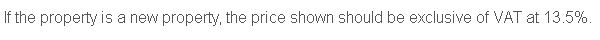

In [137]:
ppr_vat_exclusive = ppr.groupby(['vat_exclusive']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_vat_exclusive = pd.DataFrame(ppr_vat_exclusive)
ppr_vat_exclusive = ppr_vat_exclusive.reset_index(drop=False)

ppr_vat_exclusive['% of vat_exclusive'] = ppr_vat_exclusive['count'] /ppr_vat_exclusive['count'].sum()
print(ppr_vat_exclusive)

# vat_exclusive
fig = px.bar(x = ppr_vat_exclusive['vat_exclusive'], 
             y =  ppr_vat_exclusive["count"])

fig.update_layout(title = "Breakdown of VAT Exclusive",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

  vat_exclusive  count  % of vat_exclusive
0            No  17590             0.79331
1           Yes   4583             0.20669


### Not Full Market Price 

In [138]:
ppr_not_full_market_price = ppr.groupby(['not_full_market_price']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_not_full_market_price = pd.DataFrame(ppr_not_full_market_price)
ppr_not_full_market_price = ppr_not_full_market_price.reset_index(drop=False)

ppr_not_full_market_price['% of not_full_market_price'] = ppr_not_full_market_price['count'] /ppr_not_full_market_price['count'].sum()
print(ppr_not_full_market_price)


# not_full_market_price
fig = px.bar(x = ppr_not_full_market_price['not_full_market_price'], 
             y =  ppr_not_full_market_price["count"])

fig.update_layout(title = "Breakdown of Not Full Market Price",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

  not_full_market_price  count  % of not_full_market_price
0                    No  21294                     0.96036
1                   Yes    879                     0.03964


### Data Exploration

In [139]:
# GDA breakdown
ppr_DGA = ppr.groupby(['county']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_DGA = pd.DataFrame(ppr_DGA)
ppr_DGA = ppr_DGA.reset_index(drop=False)
ppr_DGA['% of Non/ GDA'] = ppr_DGA['count'] /ppr_DGA['count'].sum()
print(ppr_DGA)

# GRAP
fig = px.bar(x = ppr_DGA['county'], 
             y =  ppr_DGA["count"])

fig.update_layout(title = "Breakdown of Non/ GDA",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

    county  count  % of Non/ GDA
0   DUBLIN  13934        0.62842
1  KILDARE   2995        0.13507
2    MEATH   2166        0.09769
3  WICKLOW   1612        0.07270
4    LOUTH   1466        0.06612


### Year and Median by County

In [140]:
# read the CSV file
original_ppr = pd.read_csv('data/PPR-ALL.csv', 
                  parse_dates = ['Date of Sale (dd/mm/yyyy)'], 
                  low_memory=False)

# renaming columns
original_ppr = original_ppr.rename(columns={"Date of Sale (dd/mm/yyyy)" : "date",
                         "Address":"address",
                         "County":"county",
                         "Eircode":"eircode",
                         "Price (€)":"price",
                         "Not Full Market Price":"not_full_market_price",
                         "VAT Exclusive":"vat_exclusive",
                         "Description of Property":"description",
                         "Property Size Description":"size_description"})

original_ppr['year'] = pd.DatetimeIndex(original_ppr['date']).year

# dropping '€' sign and the commas 
original_ppr['price'] = original_ppr['price'].str.replace("€","")
original_ppr['price'] = original_ppr['price'].str.replace(",","")

# converting to a float
original_ppr['price'] = original_ppr['price'].astype('float')

original_ppr['county'] =original_ppr['county'].str.upper()

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '13/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '14/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '15/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '16/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '18/01/2010' in DD/MM/YYYY f

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '25/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '26/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '27/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Karina\miniconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '28/06/2019' in DD/MM/YYYY f

In [122]:
median_year_county = original_ppr[['year', 'county','price']][original_ppr['county'].str.contains('DUBLIN|WICKLOW|LOUTH|MEATH|KILDARE')].groupby([ 'year', 'county' ]).median().sort_values(by= 'year', ascending=False).reset_index()

median_year_county

,year,county,price
0,2022,WICKLOW,370000.00000
1,2022,WESTMEATH,220000.00000
2,2022,MEATH,290748.00000
3,2022,LOUTH,229955.95000
4,2022,KILDARE,333920.00000
...,...,...,...
73,2010,LOUTH,170000.00000
74,2010,KILDARE,223570.00000
75,2010,WESTMEATH,145000.00000
76,2010,WICKLOW,252246.70000


In [123]:
pd.pivot_table(median_year_county, index='year', columns='county', values='price').reset_index()

county,year,DUBLIN,KILDARE,LOUTH,MEATH,WESTMEATH,WICKLOW
0,2010,267500.00000,223570.00000,170000.00000,202643.00000,145000.00000,252246.70000
1,2011,237885.46000,200000.00000,137750.00000,175500.00000,125000.00000,210000.00000
2,2012,202643.17000,170000.00000,110000.00000,145687.22500,100000.00000,183260.50000
3,2013,220000.00000,170000.00000,107117.64000,137500.00000,85000.00000,180237.50000
4,2014,253000.00000,200000.00000,110565.50000,158118.50000,92000.00000,215000.00000
5,2015,269000.00000,223000.00000,129000.00000,189000.00000,100000.00000,242145.37500
6,2016,297500.00000,240000.00000,149779.73000,207500.00000,120000.00000,260000.00000
7,2017,321069.10500,250000.00000,180000.00000,232000.00000,140000.00000,292500.00000
8,2018,337000.00000,266250.00000,198000.00000,246000.00000,165000.00000,297048.45000
9,2019,340000.00000,270704.35000,203000.00000,262750.00000,165000.00000,300000.00000


In [124]:
ppr.head(1).transpose()

,0
id,1000000
date,2022-06-30 00:00:00
month_year,2022-06
total_address,"25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D..."
formatted_address,"25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y..."
...,...
dist_to_luas,0.44276
dist_to_commercial_zones,0.25444
dist_to_motorways,5.32245
dist_to_bus_stops,0.08611


In [125]:
airbnb = pd.read_csv('Data/merge_airbnb_listing_and_cal.csv')

In [126]:
airbnb.head(1).transpose()

,0
id,49271621.00000
latitude,51.67173
longitude,-9.99003
room_type,ENTIRE HOME/APT
host_id,397529961.00000
price,81.00000
rent_pressure_zones,NON-RPZ
availability,43.00000
permission,PLANNING PERMISSION NOT REQUIRED
geometry,POINT (-9.99003 51.67173)


In [159]:
# TOP DUBLIN LEA
airbnb[airbnb['county'] == 'DUBLIN'].groupby(['lea'])['id'].nunique().to_frame('count').sort_values(by= 'count', ascending=False).reset_index()

,lea,count
0,NORTH INNER CITY LEA,811
1,SOUTH EAST INNER CITY LEA,557
2,SOUTH WEST INNER CITY LEA,402
3,PEMBROKE LEA,283
4,CABRA-GLASNEVIN LEA,261
5,KIMMAGE-RATHMINES LEA,182
6,HOWTH-MALAHIDE LEA,143
7,CLONTARF LEA,138
8,DUN LAOGHAIRE LEA,121
9,ARTANE-WHITEHALL LEA,108


In [93]:
# TOP DUBLIN LEA
airbnb[airbnb['county'] == 'DUBLIN'].groupby(['electoral_divisions'])['id'].nunique().to_frame('count').sort_values(by= 'count', ascending=False).reset_index().head(15)

,electoral_divisions,count
0,"SOUTH DOCK, CO.DUBLIN",146
1,"NORTH CITY, CO.DUBLIN",138
2,"ROYAL EXCHANGE A, CO.DUBLIN",120
3,"MERCHANTS QUAY B, CO.DUBLIN",113
4,"NORTH DOCK B, CO.DUBLIN",110
5,"ARRAN QUAY C, CO.DUBLIN",105
6,"SAINT KEVIN'S, CO.DUBLIN",68
7,"ARRAN QUAY B, CO.DUBLIN",68
8,"MERCHANTS QUAY C, CO.DUBLIN",65
9,"MERCHANTS QUAY A, CO.DUBLIN",63


In [160]:
# TOP DUBLIN LEA
ppr[ppr['county'] == 'DUBLIN'].groupby(['lea']).size().to_frame('count').sort_values(by= 'count', ascending=False).reset_index()

,lea,count
0,NORTH INNER CITY LEA,747
1,HOWTH-MALAHIDE LEA,730
2,CLONTARF LEA,720
3,CLONDALKIN LEA,641
4,CABRA-GLASNEVIN LEA,605
5,SWORDS LEA,576
6,SOUTH WEST INNER CITY LEA,533
7,KIMMAGE-RATHMINES LEA,493
8,SOUTH EAST INNER CITY LEA,481
9,DONAGHMEDE LEA,474


In [96]:
# TOP DUBLIN LEA
ppr[ppr['county'] == 'DUBLIN'].groupby(['electoral_divisions'])['id'].nunique().to_frame('count').sort_values(by= 'count', ascending=False).reset_index().head(15)

,electoral_divisions,count
0,"BLANCHARDSTOWN-BLAKESTOWN, CO.DUBLIN",465
1,"GLENCULLEN, CO.DUBLIN",265
2,"BALBRIGGAN RURAL, CO.DUBLIN",224
3,"CASTLEKNOCK-KNOCKMAROON, CO.DUBLIN",206
4,"SWORDS-FORREST, CO.DUBLIN",204
5,"LUCAN-ESKER, CO.DUBLIN",199
6,"NEWCASTLE, CO.DUBLIN",179
7,"ASHTOWN A, CO.DUBLIN",174
8,"LUSK, CO.DUBLIN",170
9,"LUCAN-St. HELENS, CO.DUBLIN",165


In [ ]:
# TOP DUBLIN LEA
ppr[ppr['county'] == 'DUBLIN'].groupby(['electoral_divisions'])['price'].median.nunique().to_frame('count').sort_values(by= 'count', ascending=False).reset_index().head(15)

In [97]:
# reading in the small area .geojson
small_area_gdf = gpd.read_file('Data/Shapefiles/clean_small_area_gdf.geojson')

small_area_gdf.head(1).transpose()

,0
guid,4c07d11d-f71d-851d-e053-ca3ca8c0ca7f
council,CORK COUNTY COUNCIL
county,CORK
small_area_name,AULTAGH
electoral_divisions,"AULTAGH, CO.CORK"
...,...
number_of_rooms_not_stated_%,0.04
vacant_dwellings,18.0
housing_stock,150.0
vacancy_rate_%,12.0


In [147]:
selected_vacant = small_area_gdf[(small_area_gdf['county'].str.contains('DUBLIN|WICKLOW|KILDARE|LOUTH'))|(small_area_gdf['county'] =='MEATH')].groupby(['electoral_divisions'])['vacancy_rate_%','vacant_dwellings'].mean()
selected_vacant.sort_values(by= 'vacant_dwellings', ascending=False).reset_index().head(15)

C:\Users\Karina\AppData\Local\Temp\ipykernel_18192\392720554.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,electoral_divisions,vacancy_rate_%,vacant_dwellings
0,"SOUTH DOCK, CO.DUBLIN",12.30000,546.00000
1,"FAIR GATE, CO.LOUTH",10.00000,496.00000
2,"BLANCHARDSTOWN-BLAKESTOWN, CO.DUBLIN",3.50000,488.00000
3,"NAVAN RURAL, CO.MEATH",4.40000,480.00000
4,"GLENCULLEN, CO.DUBLIN",5.30000,471.00000
5,"NAAS URBAN, CO.KILDARE",4.70000,457.00000
6,"DUNDALK RURAL, CO.LOUTH",5.00000,400.00000
7,"MERCHANTS QUAY B, CO.DUBLIN",18.20000,386.00000
8,"ARKLOW NO. 1 URBAN, CO.WICKLOW",8.60000,377.00000
9,"MAYNOOTH, CO.KILDARE",5.50000,368.00000


In [150]:
dublin_vacant = small_area_gdf[small_area_gdf['county'].str.contains('DUBLIN')].groupby(['electoral_divisions'])['vacancy_rate_%','vacant_dwellings'].mean()
dublin_vacant.sort_values(by= 'vacancy_rate_%', ascending=False).reset_index().head(15)

C:\Users\Karina\AppData\Local\Temp\ipykernel_18192\1421643681.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,electoral_divisions,vacancy_rate_%,vacant_dwellings
0,"MANSION HOUSE B, CO.DUBLIN",19.60000,90.00000
1,"MERCHANTS QUAY B, CO.DUBLIN",18.20000,386.00000
2,"PEMBROKE EAST E, CO.DUBLIN",15.40000,299.00000
3,"MERCHANTS QUAY C, CO.DUBLIN",14.60000,257.00000
4,"PEMBROKE WEST C, CO.DUBLIN",14.20000,358.00000
5,"USHERS D, CO.DUBLIN",13.40000,168.00000
6,"DÚN LAOGHAIRE-EAST CENTRAL, CO.DUBLIN",12.80000,159.00000
7,"INNS QUAY C, CO.DUBLIN",12.70000,174.00000
8,"RATHMINES WEST F, CO.DUBLIN",12.40000,197.00000
9,"SOUTH DOCK, CO.DUBLIN",12.30000,546.00000


In [ ]:
selected_vacant = small_area_gdf[(small_area_gdf['county'].str.contains('DUBLIN|WICKLOW|KILDARE|LOUTH'))|(small_area_gdf['county'] =='MEATH')].groupby(['electoral_divisions'])['vacancy_rate_%','vacant_dwellings'].mean()
selected_vacant.sort_values(by= 'vacancy_rate_%', ascending=False).reset_index().head(15)